In [218]:
import lib
import viz
import analysis
import pandas as pd
import os
import seaborn as sns
from loguru import logger
import sys

logger.remove()
logger.add(sys.stderr, level="INFO")


os.environ["OPENAI_KEY"] = "??"

GPT3 = "gpt3__text-davinci-003"

# Yedetore CHILDES models with best test perplexity.
BEST_CHILDES_LSTM = "childes_lstm_8"
BEST_CHILDES_TRANSFORMER = "childes_transformer_8"

TRANSFORMER_CHILDES = "retrained__ATB__retraining__dataset_childes__seed_1000__v2023-11-10a__tiny__samples_0__transformer__689eebcb__epoch_58"
TRANSFORMER_WIKIPEDIA = "retrained__PG__retraining__dataset_wikipedia__seed_1000__v2023-11-10a__tiny__samples_0__transformer__76a79487__epoch_18"

RAW_SURPRISAL_MODELS = (BEST_CHILDES_LSTM, 
                        BEST_CHILDES_TRANSFORMER, 
                        "grnn", 
                        TRANSFORMER_WIKIPEDIA, 
                        "gpt2", 
                        "gpt-j", 
                        GPT3,)

MODEL_TO_LABEL = {
                "grnn": "Wikipedia LSTM",
                TRANSFORMER_WIKIPEDIA: "Wikipedia Transformer",
                BEST_CHILDES_LSTM: "CHILDES LSTM", 
                BEST_CHILDES_TRANSFORMER: "CHILDES Transformer",
                GPT3: "GPT-3",
                "gpt-j": "GPT-j",
                 }

MODEL_TO_LABEL_BARS={
    "grnn": "Wikipedia\nLSTM",
    "grnn__ATB__retraining__ratio_0_7__seed_1111__v2023-10-20a__small__epoch_8": "GRNN-retrain\nepoch3",  
    BEST_CHILDES_LSTM: "CHILDES\nLSTM",
    BEST_CHILDES_TRANSFORMER: "CHILDES\nTransformer",
    TRANSFORMER_CHILDES: "Big\nCHILDES\nTransformer",
    TRANSFORMER_WIKIPEDIA: "Wikipedia\nTransformer",
    GPT3: "GPT-3",
    "gpt-j": "GPT-j",
}


PLUS_FILLER_LABELS = ["$+filler, +gap$", "$+filler, -gap*$",]

DPI = 250

pd.set_option('max_colwidth', 800)

sns.reset_defaults()
sns.set_theme()
sns.set_style("darkgrid")


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Ex. (1)a-b

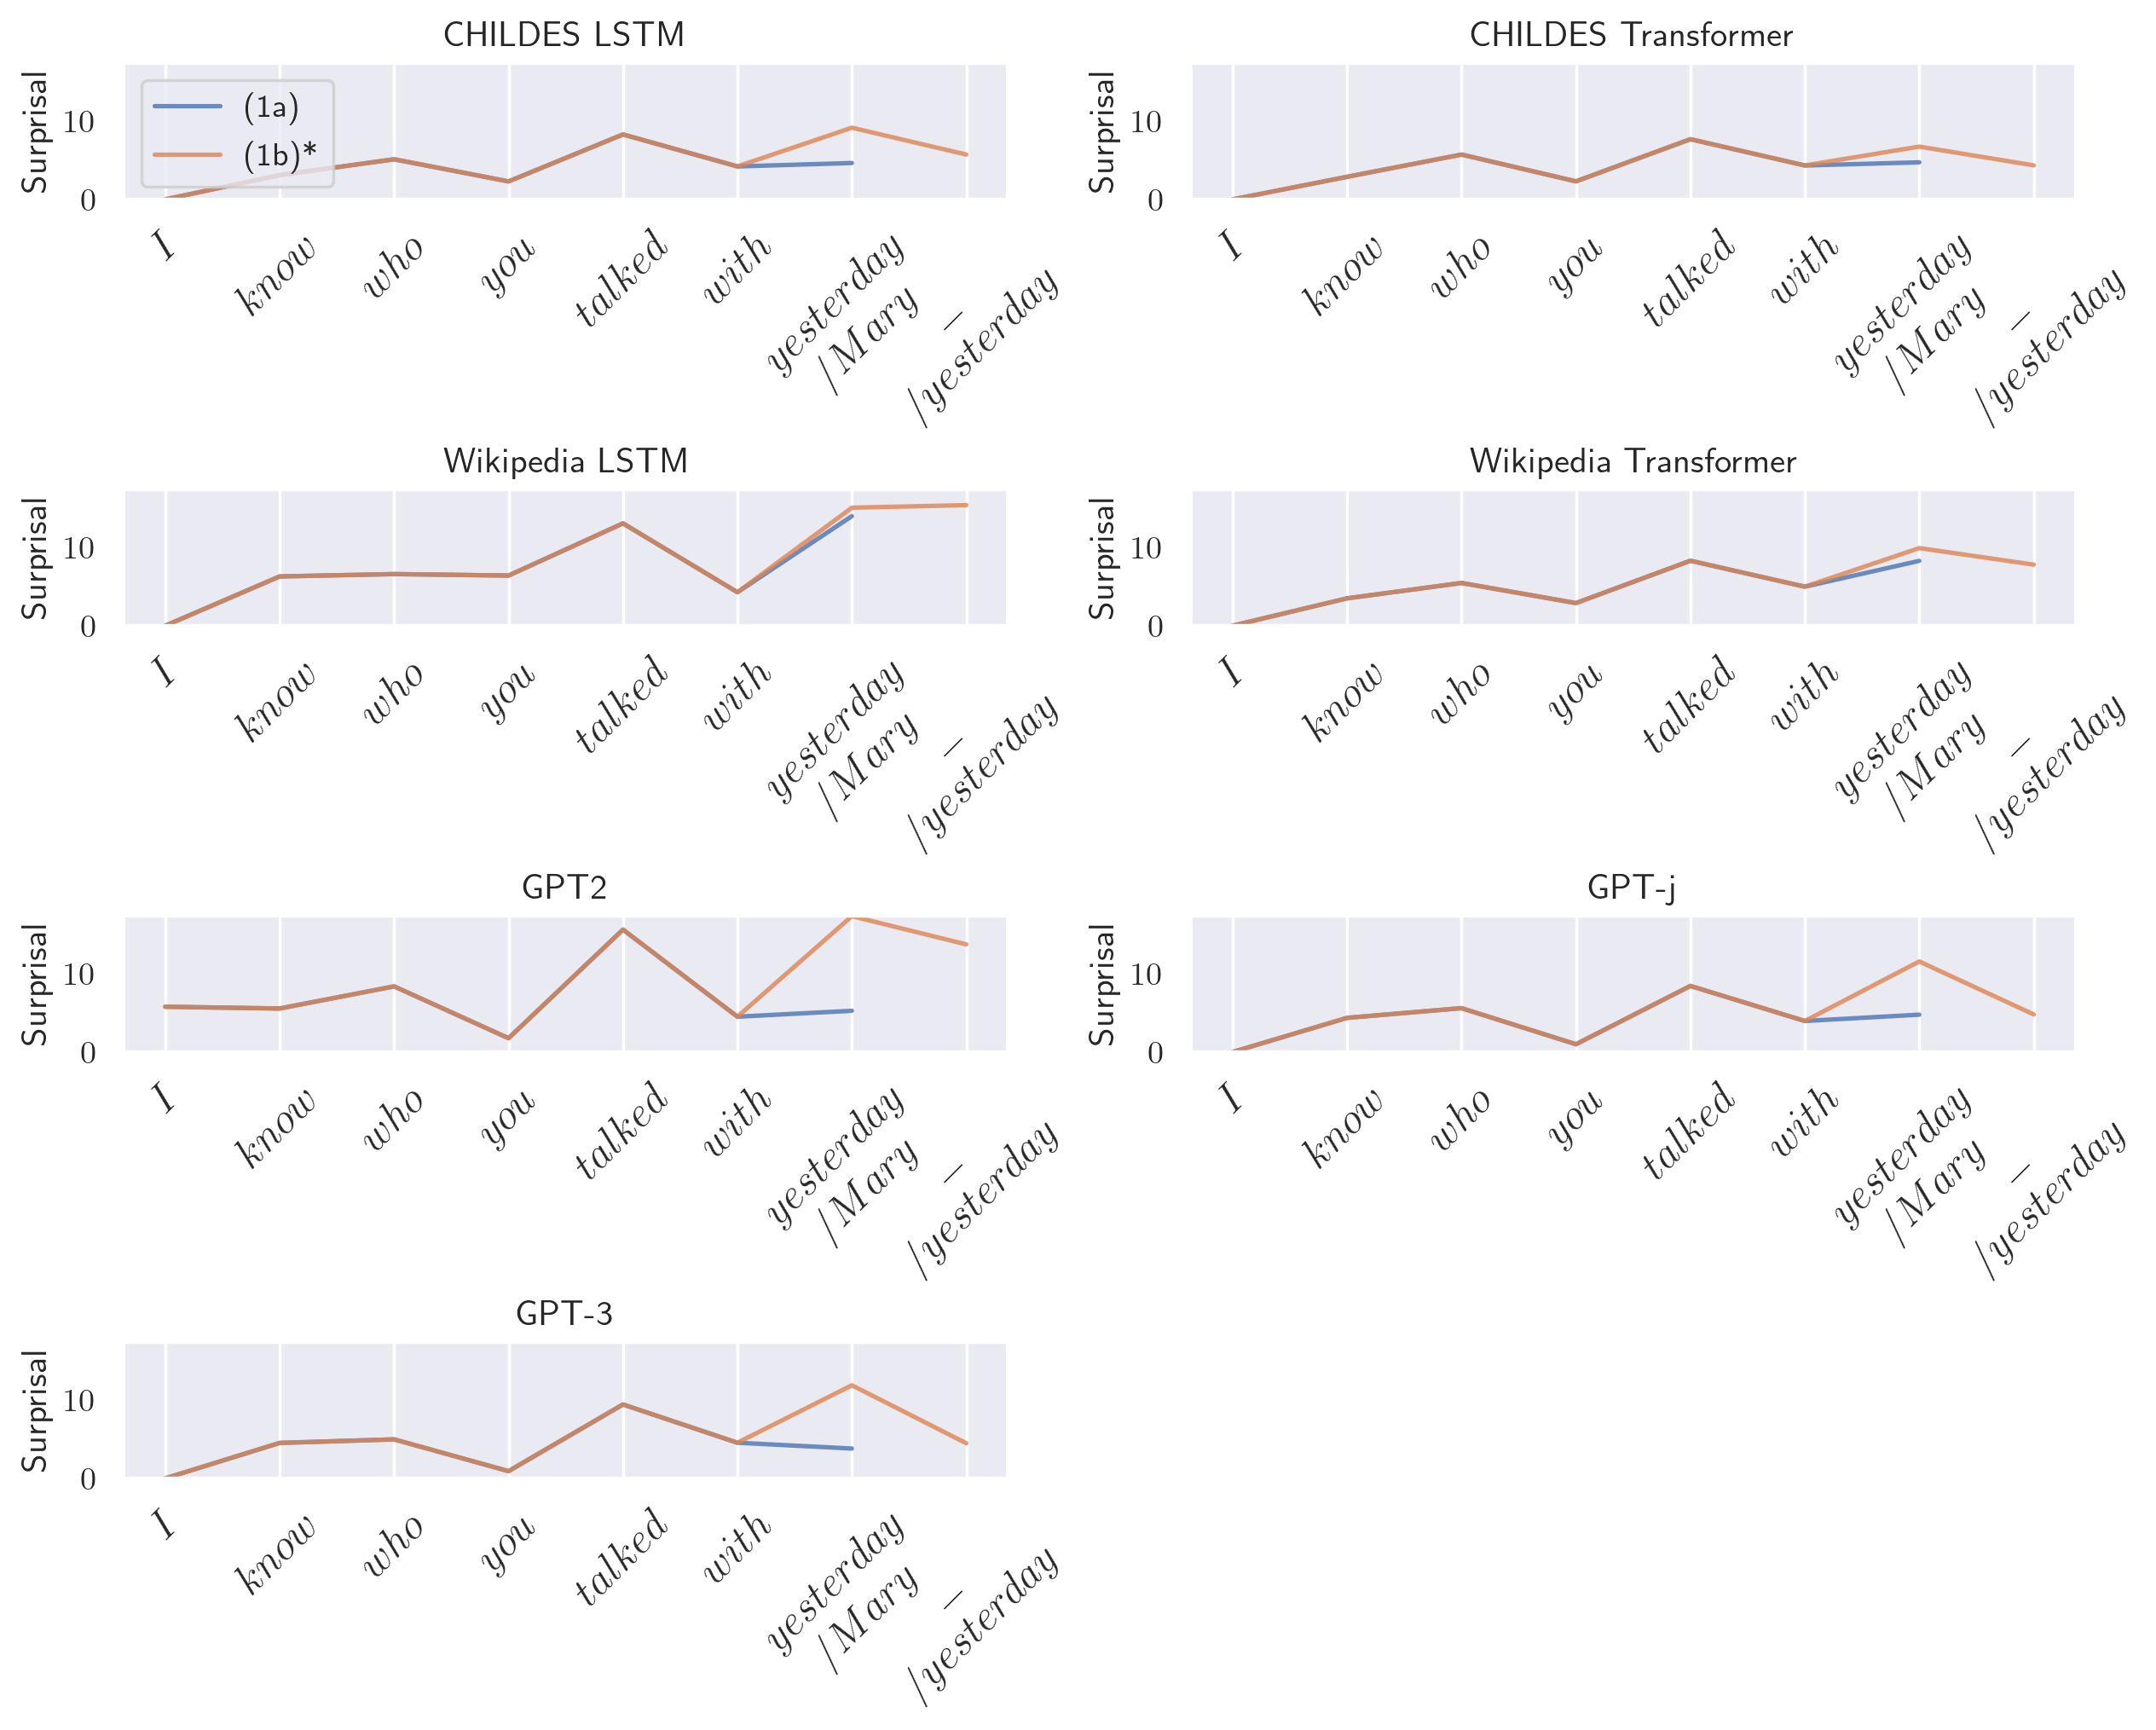

In [206]:
# fgd-simple.png

sentences = [
    "I know who you talked with yesterday",
    "I know who you talked with Mary yesterday", #*
]

viz.plot_surprisals(sentences, 
                    models=RAW_SURPRISAL_MODELS, 
                    model_to_label=MODEL_TO_LABEL,
                    labels=["(1a)", "(1b)*"],
                    save_to="fgd-simple.png",
                    dpi=DPI)

## Ex. (2)

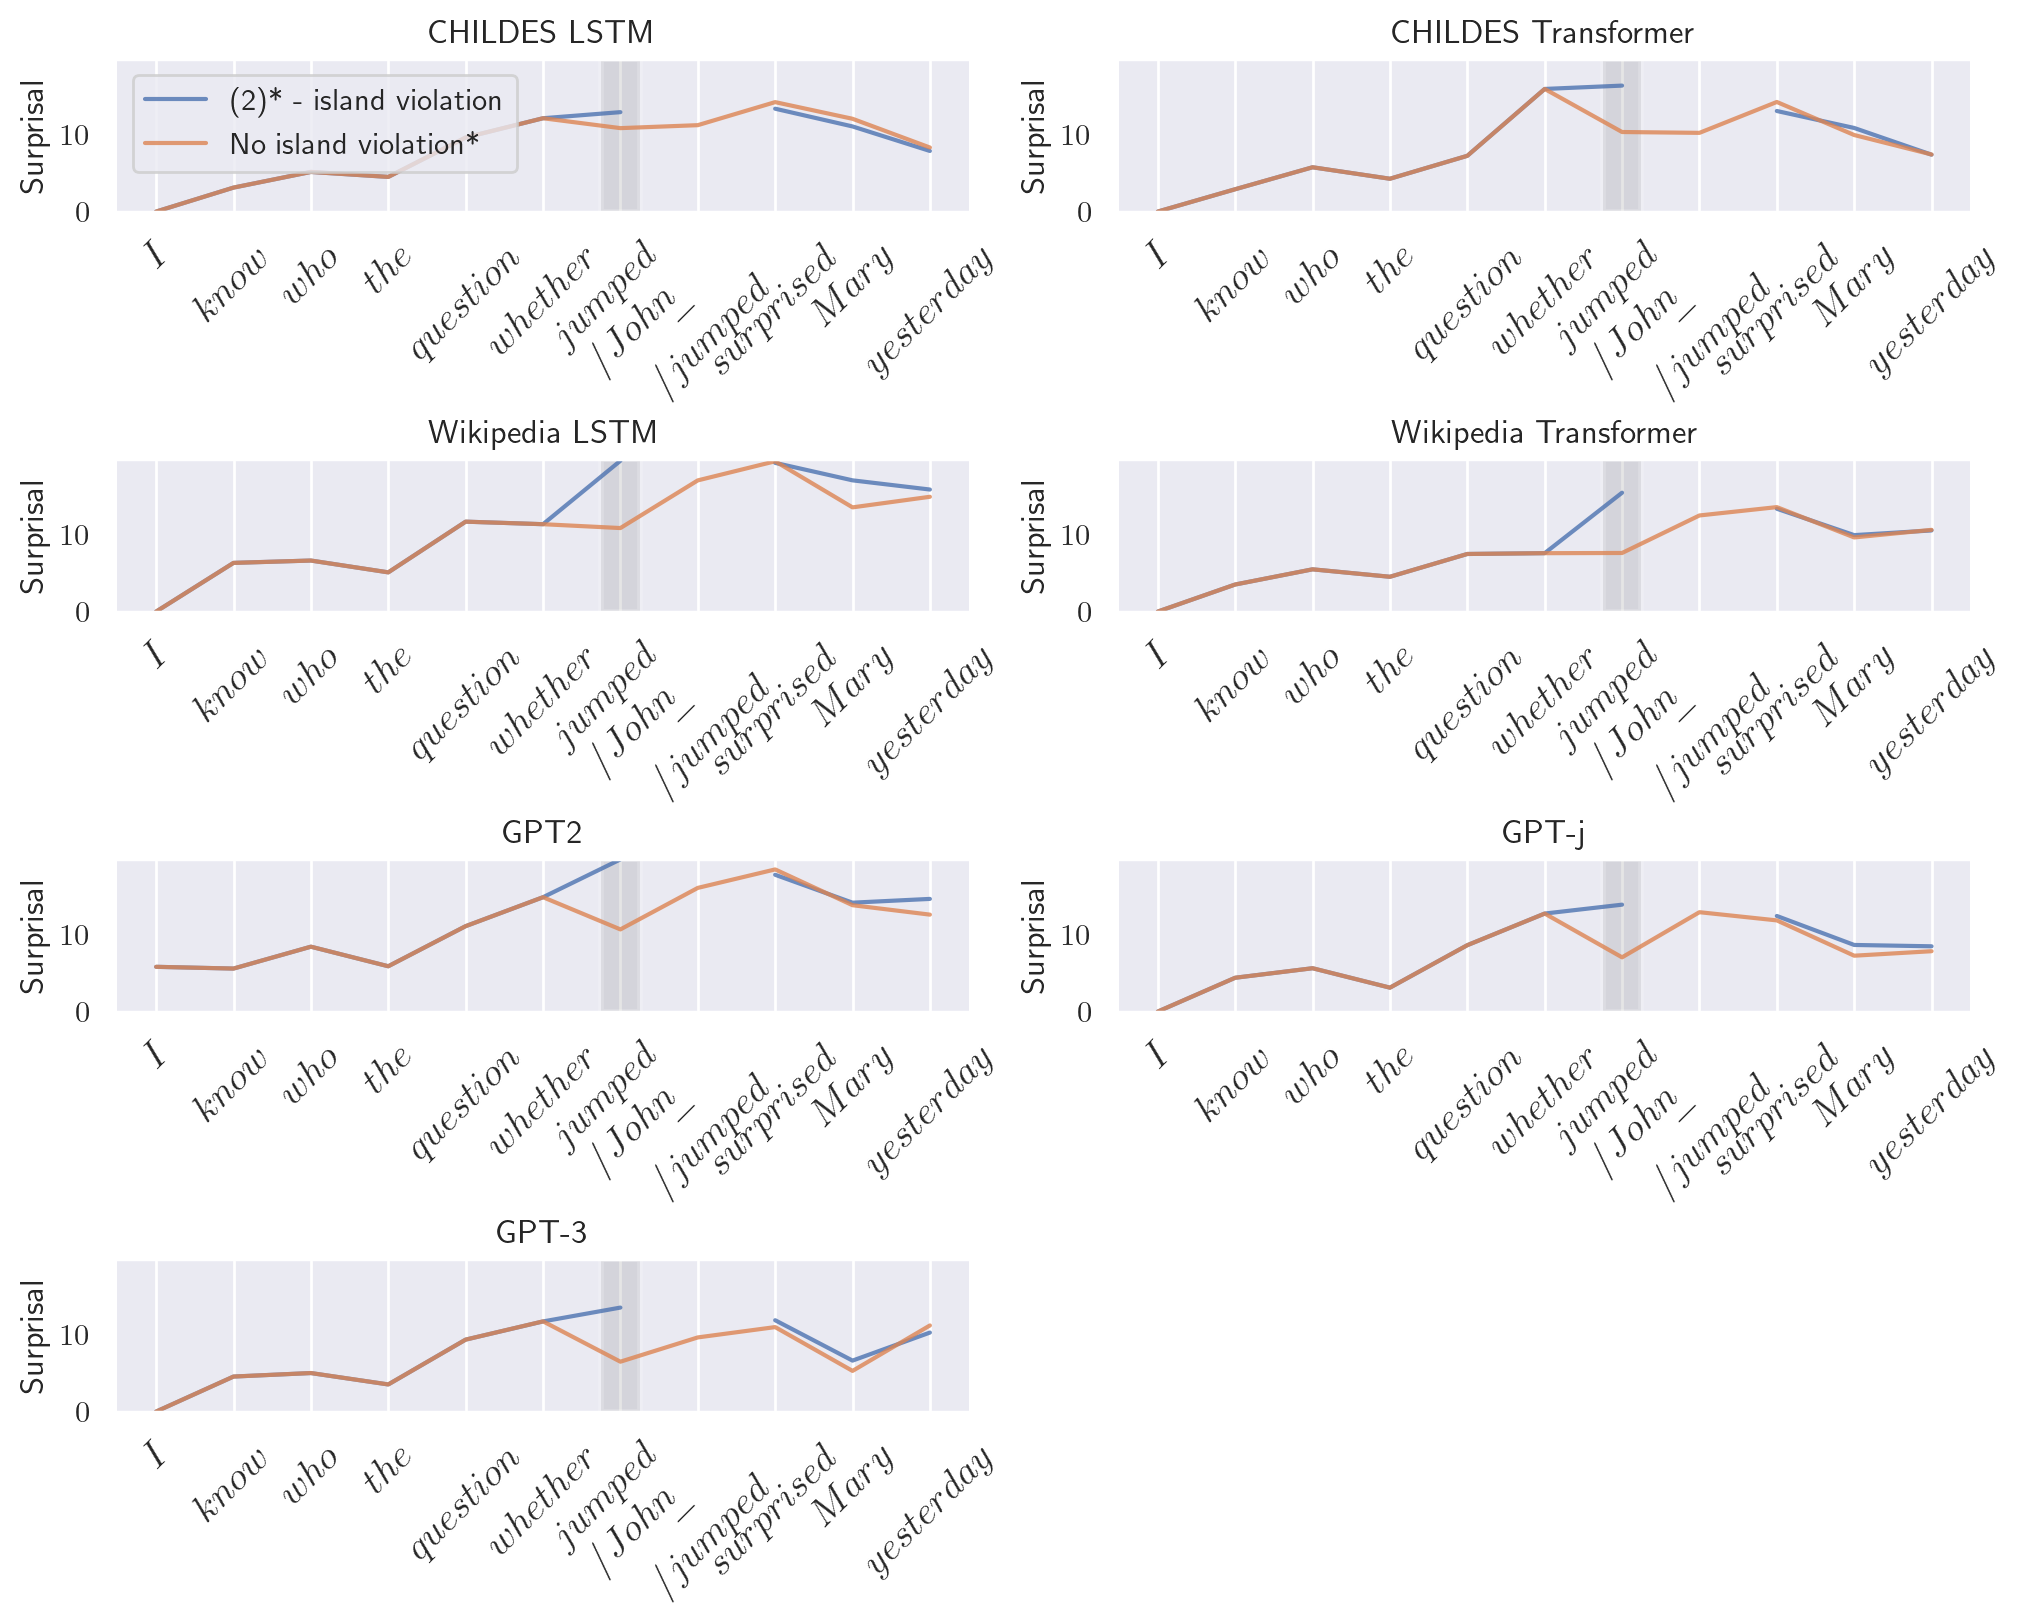

In [207]:
# very-bad-island.png

sentences = [
    "I know who the question whether jumped <pad> surprised Mary yesterday",
    "I know who the question whether _ John _ jumped surprised Mary yesterday",
]

viz.plot_surprisals(sentences, 
                    models=RAW_SURPRISAL_MODELS, 
                    model_to_label=MODEL_TO_LABEL,
                    save_to="very-bad-island.png",
                    labels=["(2)* - island violation", "No island violation*"],
                   )

# Exx. 3-6

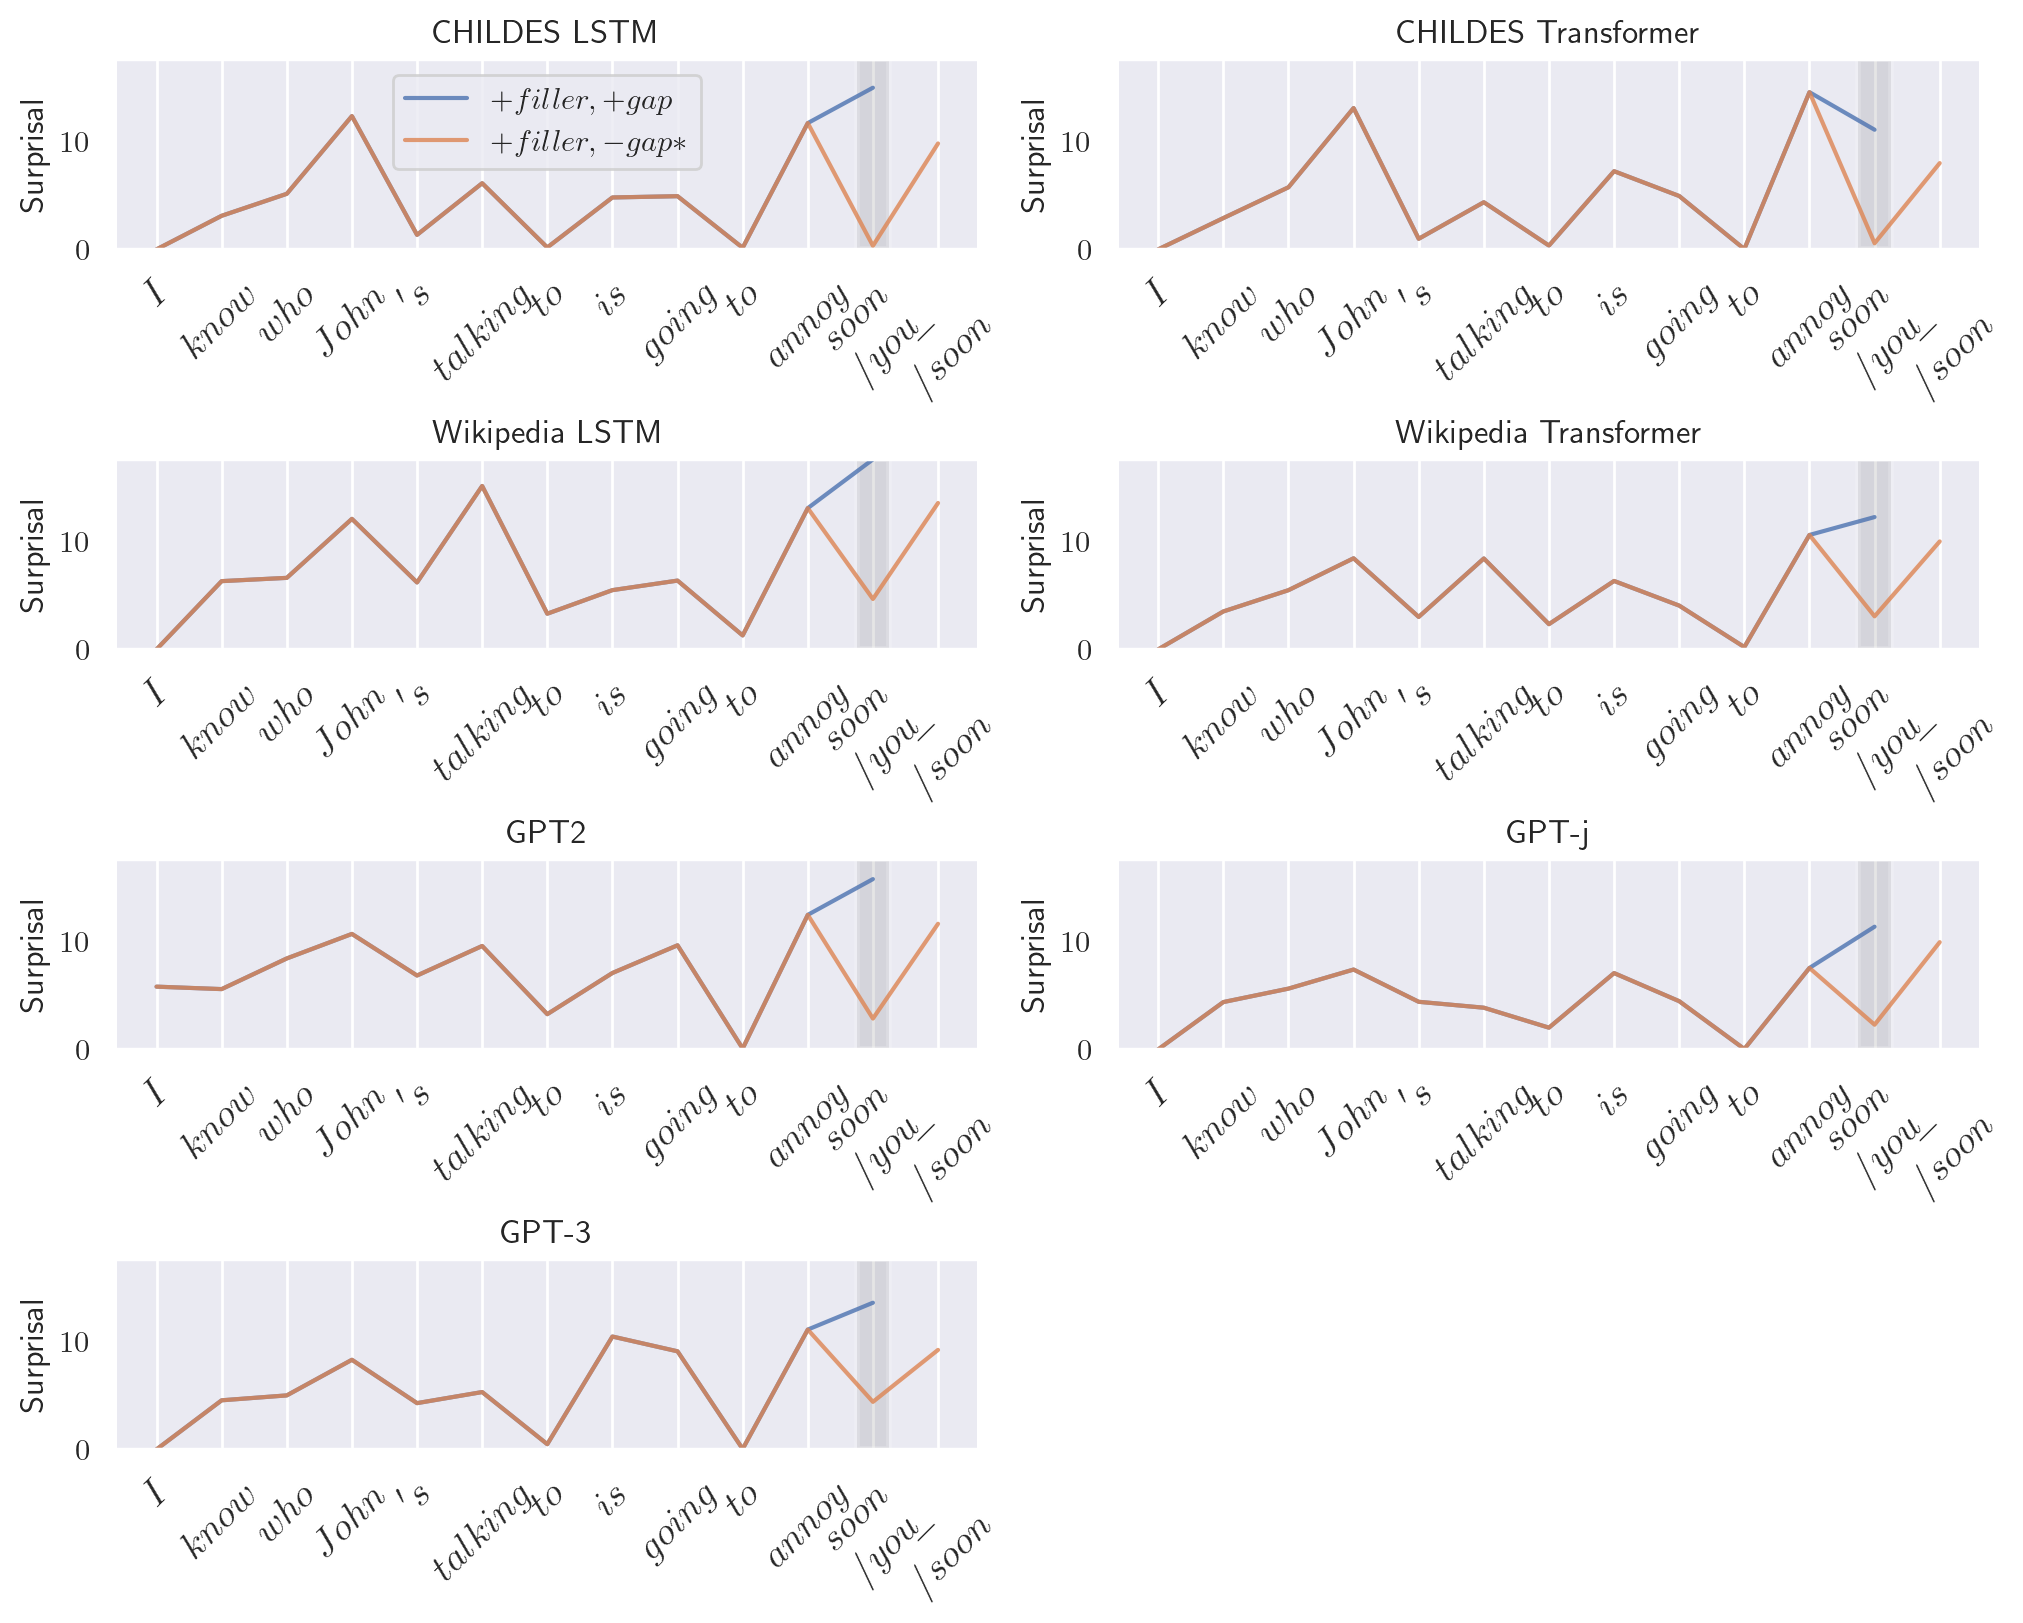

In [209]:
# (3)-(4)
# island-bad-pg-good.png

sentences = [
    "I know who John's talking to is going to annoy soon",
    "I know who John's talking to is going to annoy _ you _ soon", #*
]

viz.plot_surprisals(sentences, labels=PLUS_FILLER_LABELS, 
                    models=RAW_SURPRISAL_MODELS, 
                    save_to="island-bad-pg-good.png",
                    model_to_label=MODEL_TO_LABEL,
                   dpi=DPI)

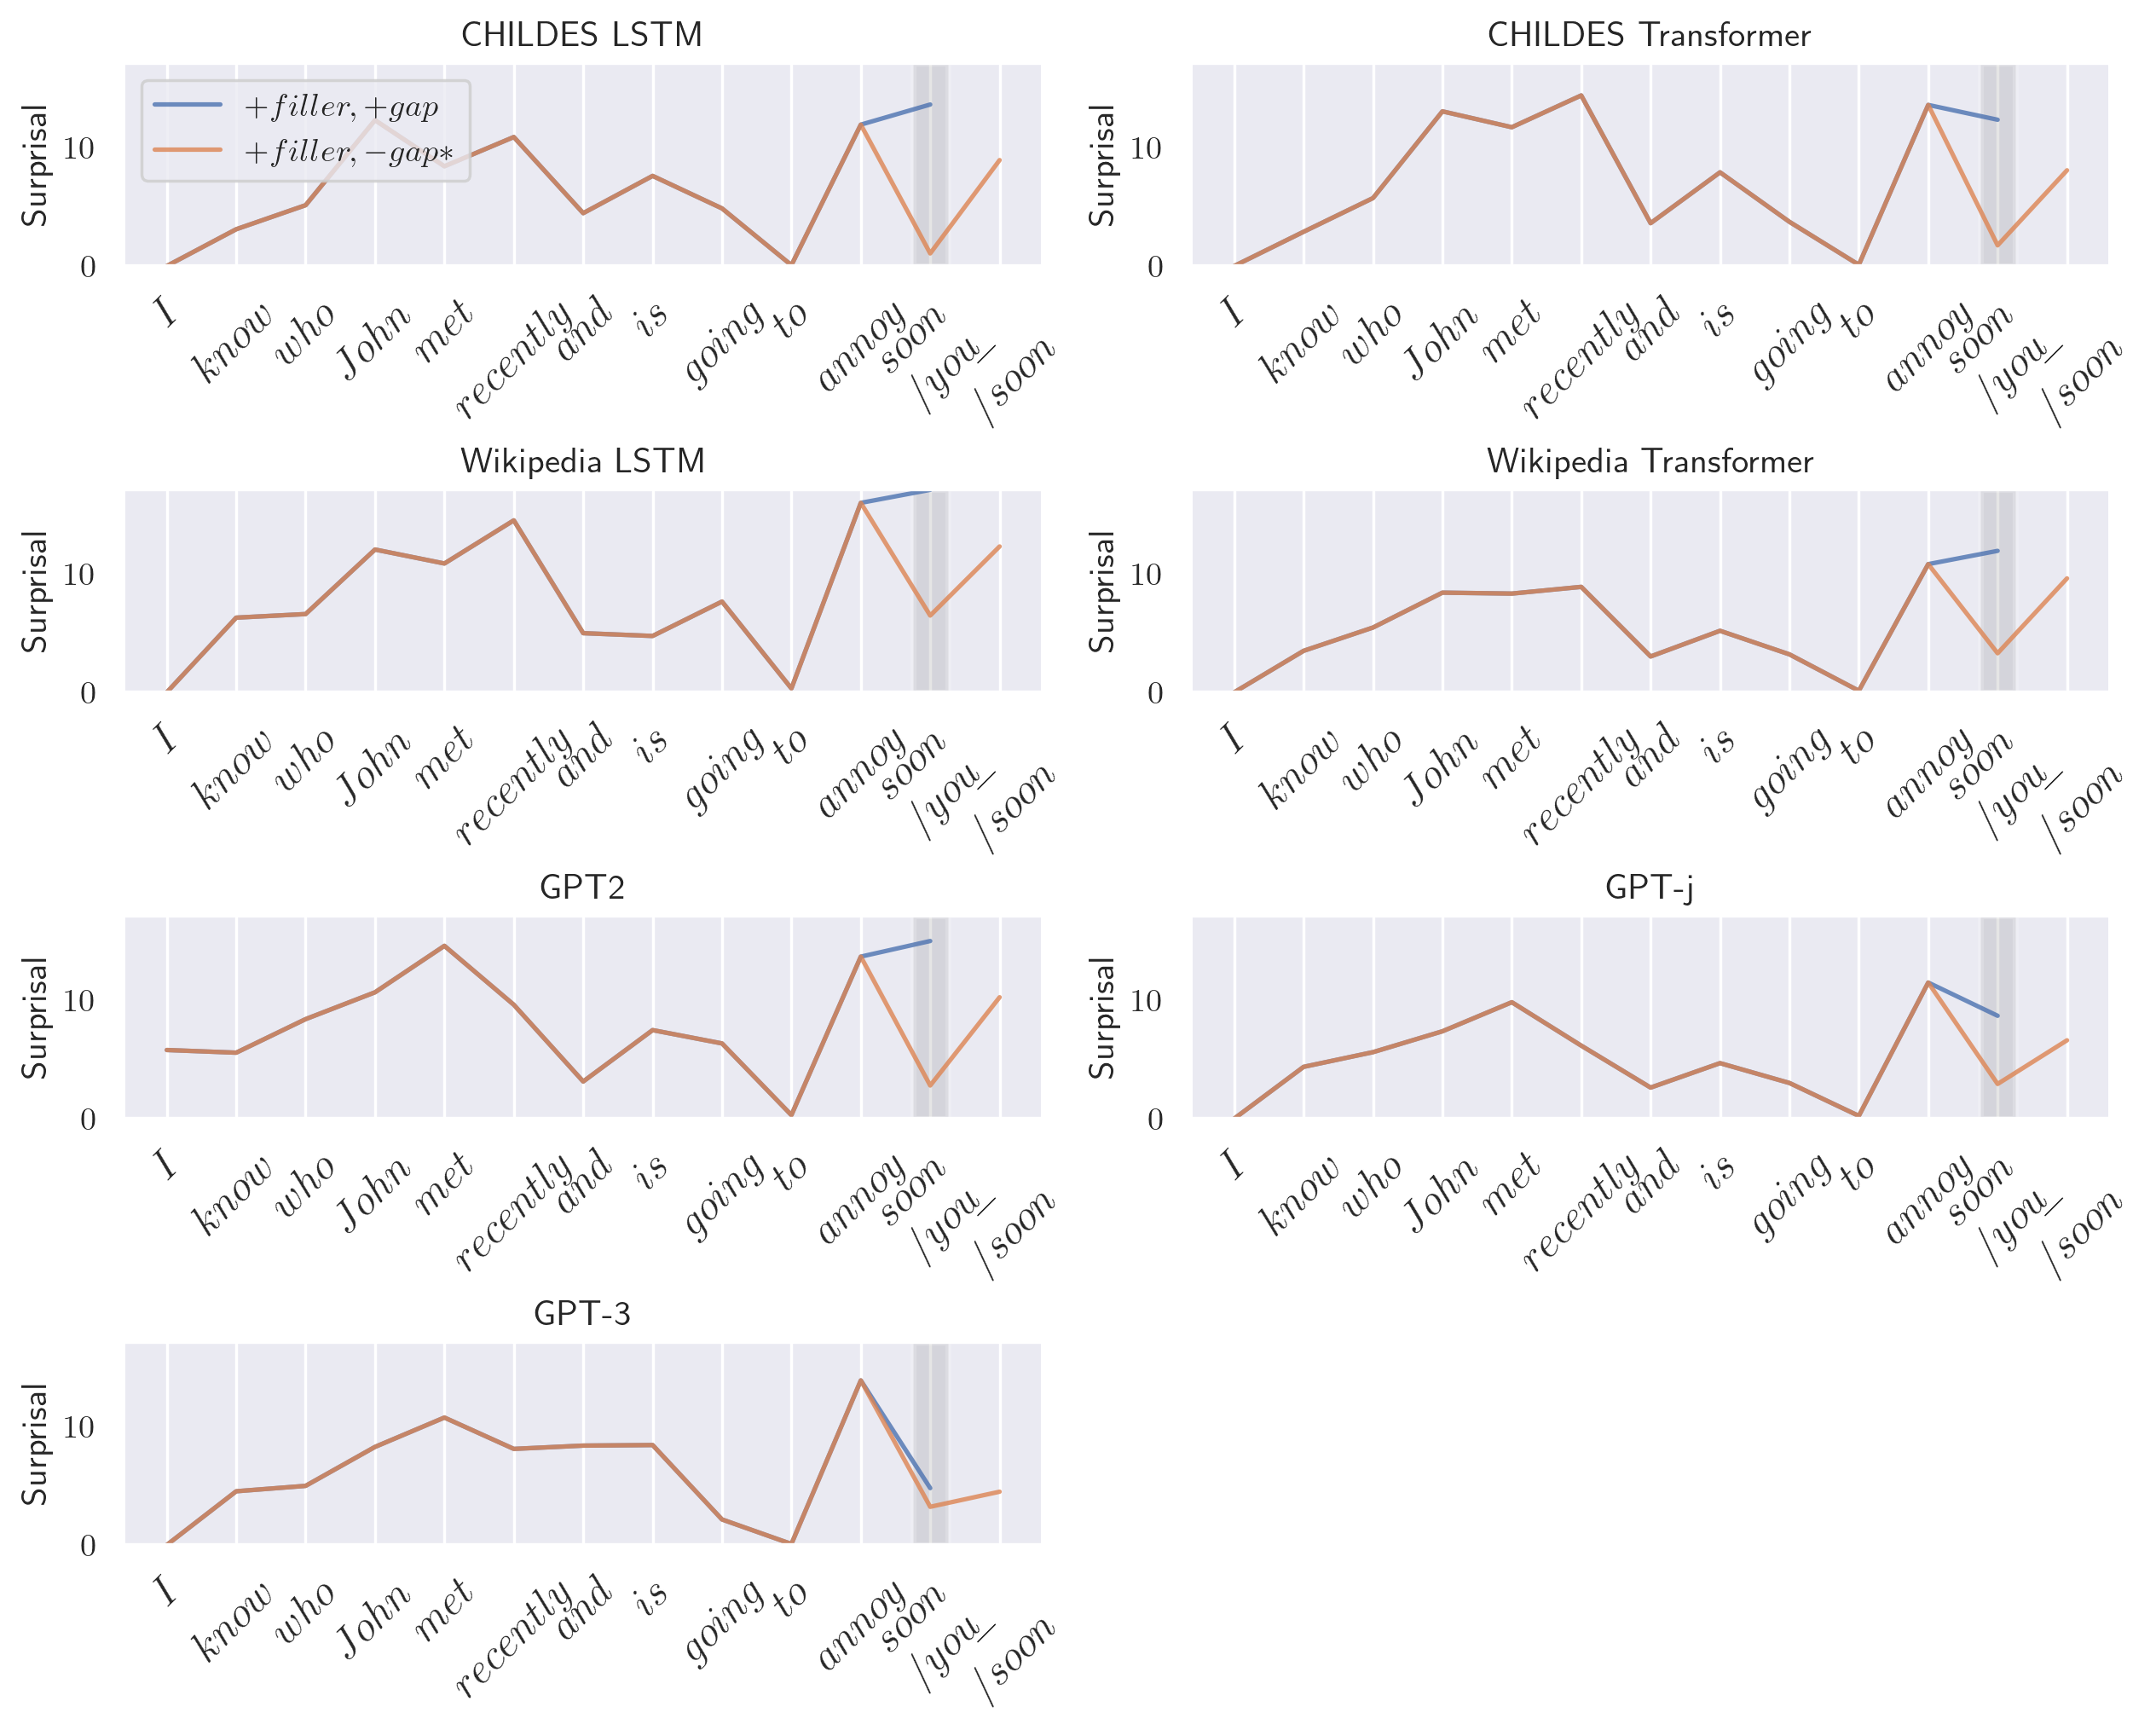

In [212]:
# (5)-(6)
# island-bad-atb-good.png

sentences = [
    "I know who John met recently and is going to annoy soon",
    "I know who John met recently and is going to annoy _ you _ soon", #*
]

viz.plot_surprisals(sentences, labels=PLUS_FILLER_LABELS, 
                    models=RAW_SURPRISAL_MODELS, 
                    save_to="island-bad-atb-good.png",
                    model_to_label=MODEL_TO_LABEL,
                    dpi=DPI)

## Accuracy plots

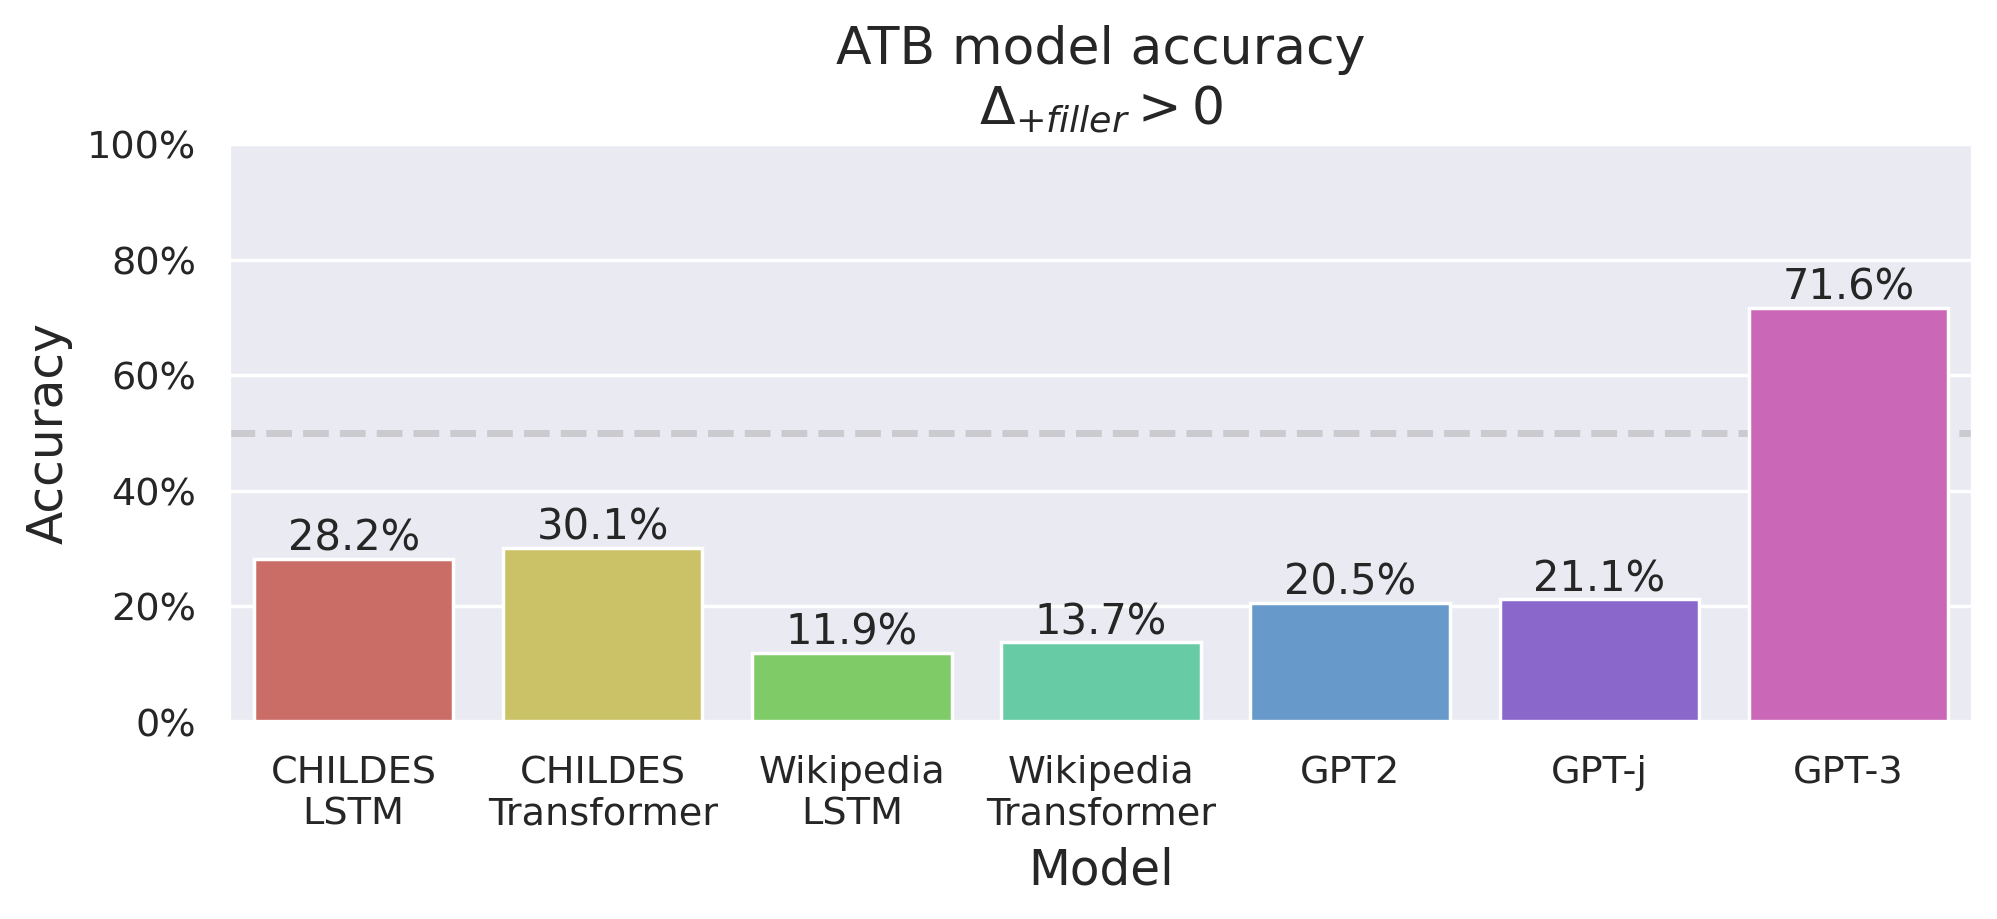

In [219]:
# accuracy-plus-filler-atb.png

atb_grammar_id = "tiny_v2023-11-10a"

viz.plot_accuracy_bars(
    phenomenon="ATB",
    models=(
        BEST_CHILDES_LSTM,
        BEST_CHILDES_TRANSFORMER,
        "grnn",
        TRANSFORMER_WIKIPEDIA,
        "gpt2",
        "gpt-j",
        GPT3,
    ),
    model_to_label=MODEL_TO_LABEL_BARS,
    df_id=atb_grammar_id,
    interaction_column="delta_plus_filler",
    dpi=DPI,
    save_to="accuracy-plus-filler-atb.png",
)


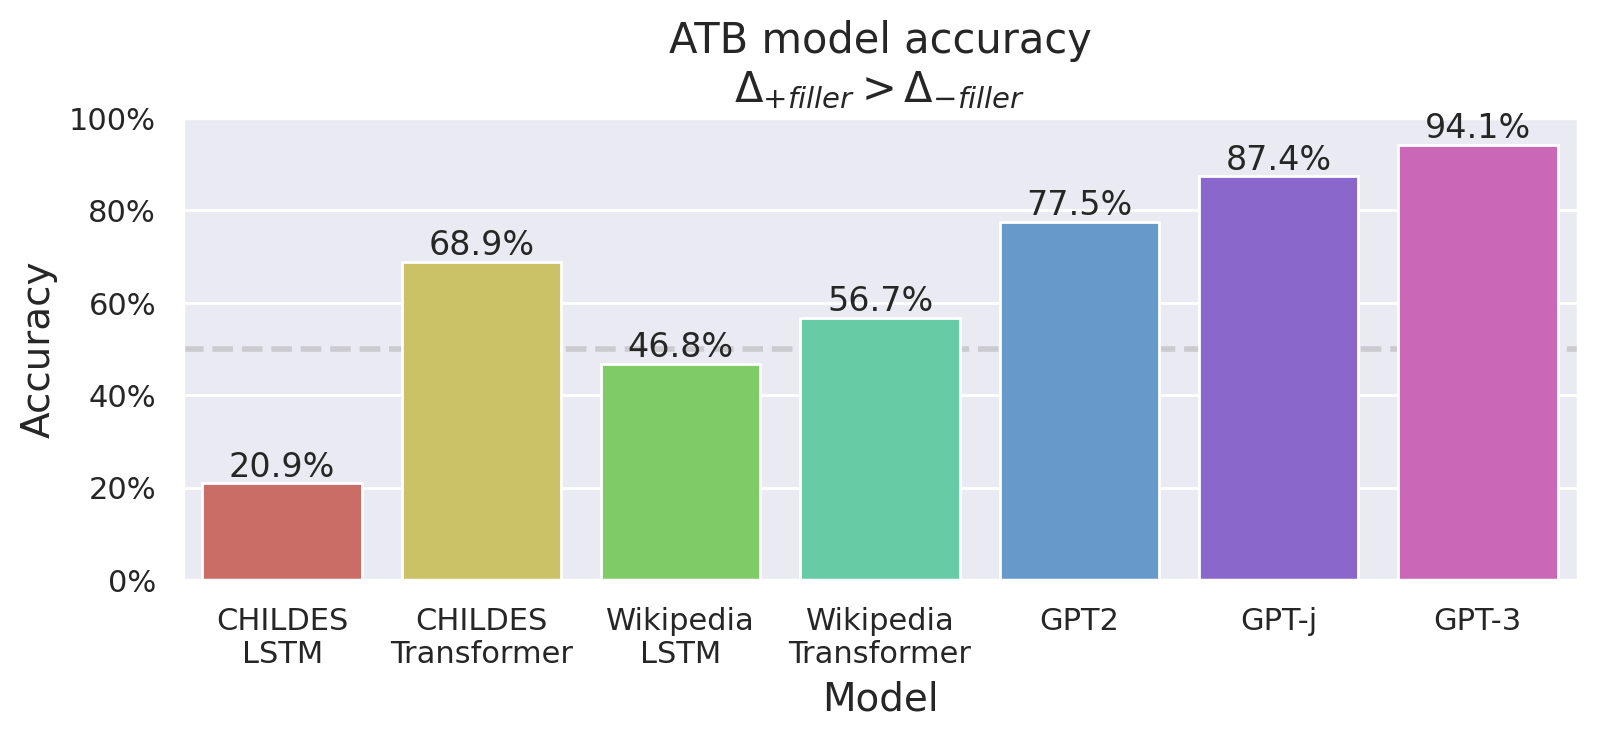

In [220]:
# accuracy-did-atb.png

viz.plot_accuracy_bars(
    phenomenon="ATB",
    models=(
        BEST_CHILDES_LSTM,
        BEST_CHILDES_TRANSFORMER,
        "grnn",
        TRANSFORMER_WIKIPEDIA,
        "gpt2",
        "gpt-j",
        GPT3,
    ),
    model_to_label=MODEL_TO_LABEL_BARS,
    df_id=atb_grammar_id,
    interaction_column="interaction",
    dpi=200,
    save_to="accuracy-did-atb.png",
)

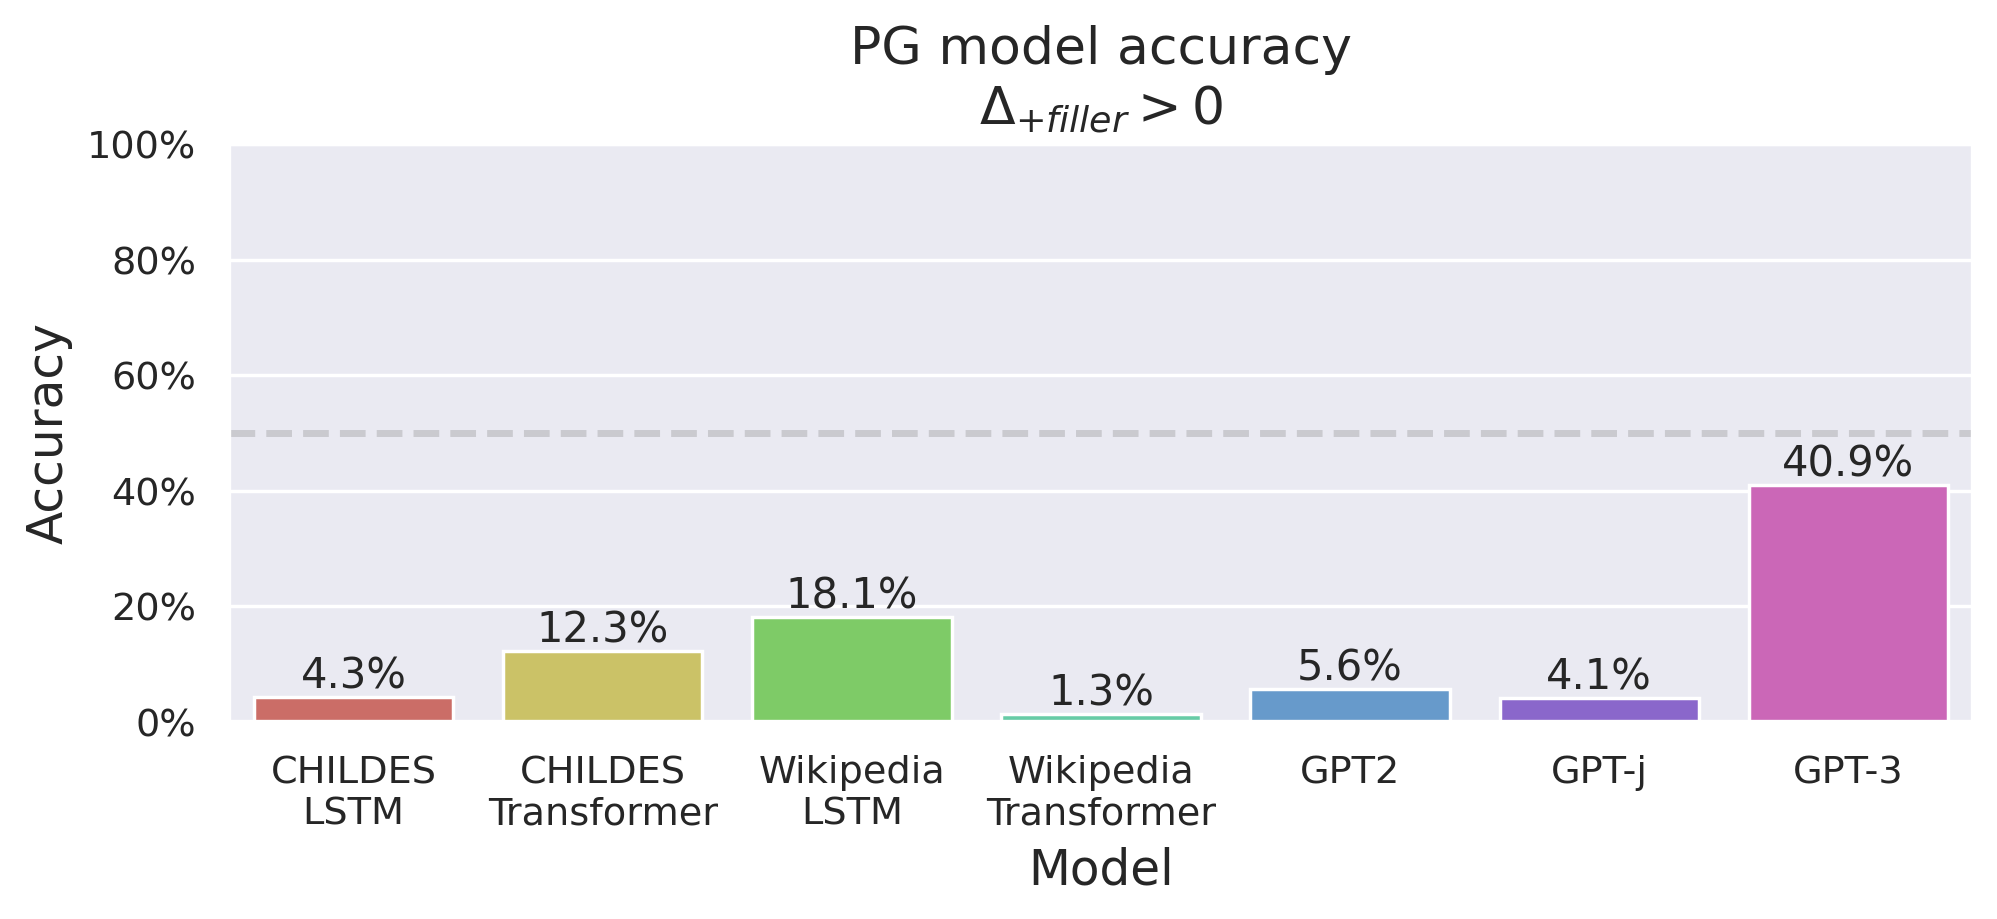

In [223]:
# accuracy-plus-filler-pg.png

pg_grammar_id = "small_v2023-11-10a"

viz.plot_accuracy_bars(
    phenomenon="PG",
    models=(
        BEST_CHILDES_LSTM,
        BEST_CHILDES_TRANSFORMER,
        "grnn",
        TRANSFORMER_WIKIPEDIA,
        "gpt2",
        "gpt-j",
        GPT3,
    ),
    model_to_label=MODEL_TO_LABEL_BARS,
    df_id=pg_grammar_id,
    interaction_column="delta_plus_filler",
    dpi=DPI,
    save_to="accuracy-plus-filler-pg.png",
)

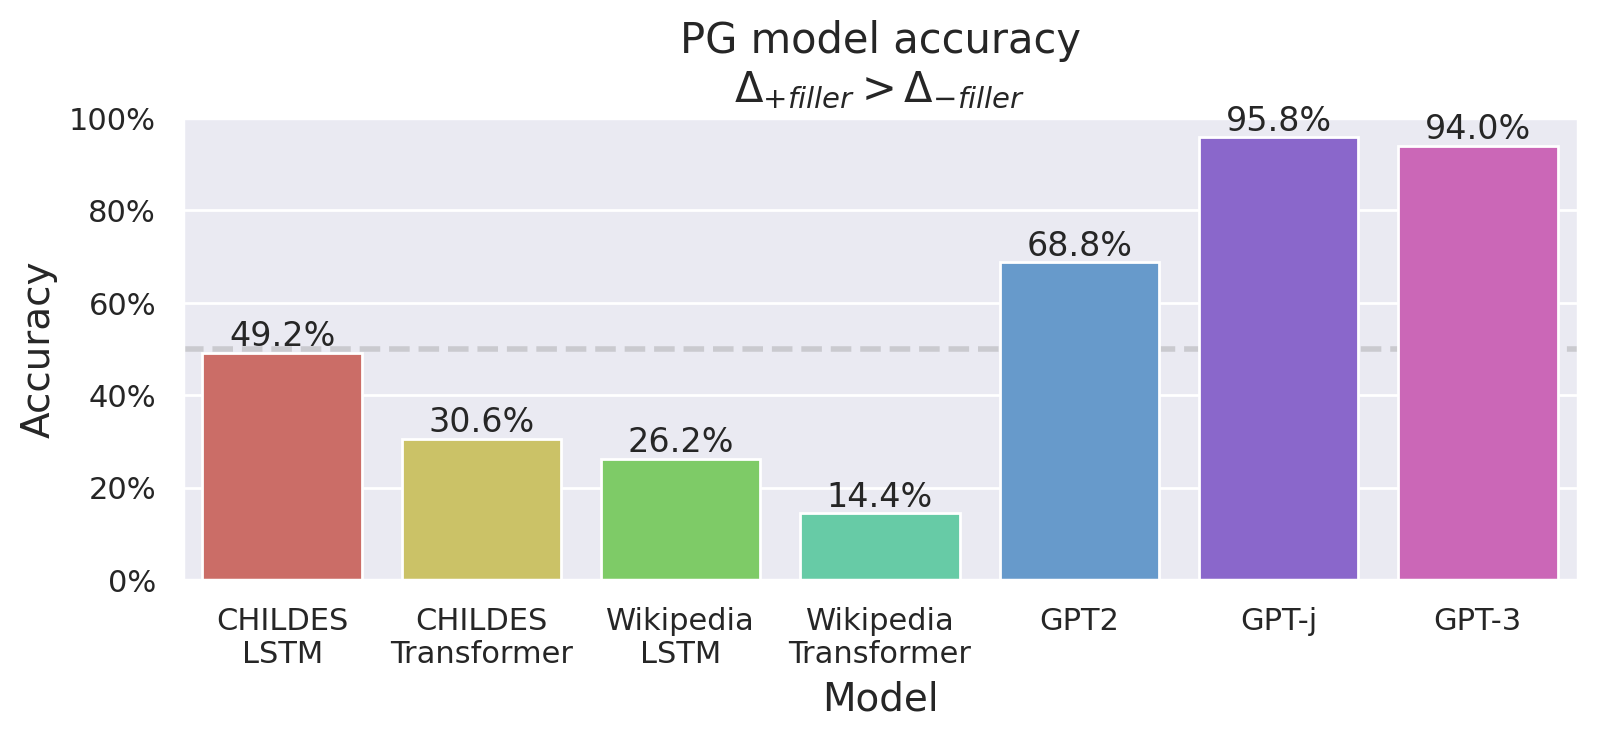

In [184]:
# accuracy-did-pg.png

analysis.plot_accuracy_bars(
    phenomenon="PG",
    models=(
        BEST_CHILDES_LSTM,
        BEST_CHILDES_TRANSFORMER,
        "grnn",
        TRANSFORMER_WIKIPEDIA,
        "gpt2",
        "gpt-j",
        GPT3,
    ),
    model_to_label=MODEL_TO_LABEL_BARS,
    df_id=df_ids_pg,
    interaction_column="interaction",
    dpi=200,
    save_to="accuracy-did-pg.png",
)

## Num tuples

In [185]:
phenomenon = "ATB"
df_id = "tiny_v2023-11-10a"
interaction_df = analysis._get_interaction_df(model="grnn", phenomenon=phenomenon, df_id=df_id, interaction_column="interaction")
print("Num ATB tuples", len(interaction_df))

phenomenon = "PG"
df_id = "small_v2023-11-10a"
interaction_df = analysis._get_interaction_df(model="grnn", phenomenon=phenomenon, df_id=df_id, interaction_column="interaction")
print("Num PG Tuples", len(interaction_df))

Num ATB tuples 6624
Num PG Tuples 8064
